In [5]:
import pandas as pd

avaliacoes = pd.read_csv("b2w.csv")
avaliacoes.head()

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1


In [6]:
avaliacoes = avaliacoes.drop(["original_index", "review_text_processed", "review_text_tokenized", "rating", "kfold_polarity", "kfold_rating"], axis = 1)

In [7]:
avaliacoes.head()

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
4,Além de higiênico tem o tamanho ideal. Só falt...,NaN


In [8]:
avaliacoes.dropna(inplace=True, axis=0)
avaliacoes

,review_text,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,1.0
2,recebi o produto antes do prazo mas veio com d...,0.0
3,Bom custo beneficio. Adequado para pessoas que...,1.0
5,"ótmo produto atendeu as expectativas, a entreg...",1.0
...,...,...
132367,"Ótimo jogo, um dos melhores que joguei. Entreg...",1.0
132368,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,1.0
132369,Eu estou muito chateado com isso gostaria que ...,0.0
132371,O produto anunciado no site dizia ser 100% al...,0.0


In [9]:
avaliacoes.polarity.value_counts()

polarity
1.0    80300
0.0    35758
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(avaliacoes.review_text, 
                                                             avaliacoes.polarity, stratify=avaliacoes.polarity, random_state= 71)

In [11]:
classe_teste

70278     1.0
115089    1.0
128187    0.0
68697     0.0
50025     1.0
         ... 
25617     1.0
106407    1.0
26220     1.0
109010    0.0
49437     0.0
Name: polarity, Length: 29015, dtype: float64

In [12]:
from sklearn.linear_model import LogisticRegression

# regressao_logistica = LogisticRegression()

# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)
# print(acuracia)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Este produto é muito bom", 'Este produto é muito ruim']
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [14]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [15]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [16]:
matriz_esparsa

,bom,este,muito,produto,ruim
0,1,1,1,1,0
1,0,1,1,1,1


In [17]:
vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 50508)


In [18]:
vetorizar = CountVectorizer(max_features=100)
bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
print(bag_of_words.shape)

(116058, 100)


In [19]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, avaliacoes.polarity, stratify= avaliacoes.polarity, random_state=71)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.8873686024470102


In [20]:
def treinar_modelo(dados, coluna_texto, coluna_sentimento):
    vetorizar = CountVectorizer(max_features=100)
    bag_of_words = vetorizar.fit_transform(avaliacoes.review_text)
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, avaliacoes.polarity, stratify= avaliacoes.polarity, random_state=71)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)



In [21]:
print(treinar_modelo(avaliacoes, "review_text", "polarity"))

0.8873686024470102


# Word cloud


In [22]:
from wordcloud import WordCloud

todas_avaliacoes = [texto for texto in avaliacoes.review_text]
todas_palavras = ' '.join(todas_avaliacoes)


In [23]:
len(todas_avaliacoes)

116058

In [24]:
len(todas_palavras)

16570763

In [25]:
nuvem_palavras = WordCloud().generate(todas_palavras)

In [26]:
nuvem_palavras

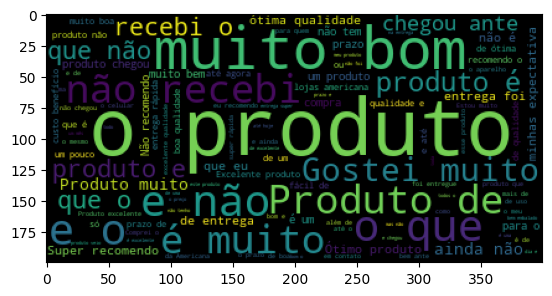

In [27]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(nuvem_palavras)

In [28]:
nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110).generate(todas_palavras)

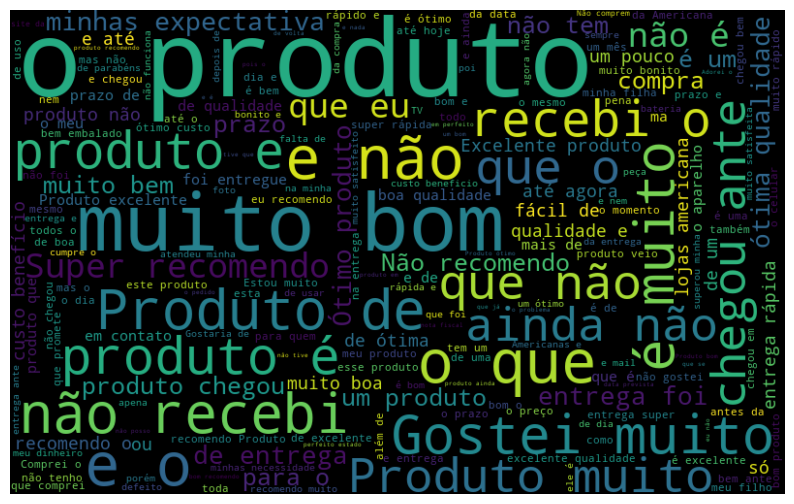

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
def word_cloud_neg(dados, coluna_texto):
    texto_negativo = dados.query("polarity == 0")
    todas_avaliacoes = [texto for texto in texto_negativo[coluna_texto]]
    todas_palavras = ' '.join(todas_avaliacoes)
    nuvem_palavras = WordCloud(width=800, 
                               height=500,
                             max_font_size=110, 
                             collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [31]:
def word_cloud_pos(dados, coluna_texto):
    texto_positivo = dados.query("polarity == 1")
    todas_avaliacoes = [texto for texto in texto_positivo[coluna_texto]]
    todas_palavras = ' '.join(todas_avaliacoes)
    nuvem_palavras = WordCloud(width=800, 
                               height=500,
                             max_font_size=110, 
                             collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

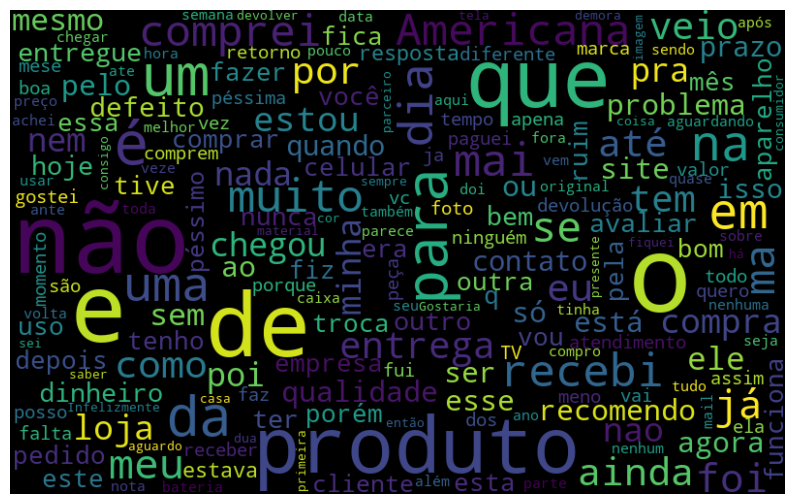

In [32]:
word_cloud_neg(avaliacoes, "review_text")

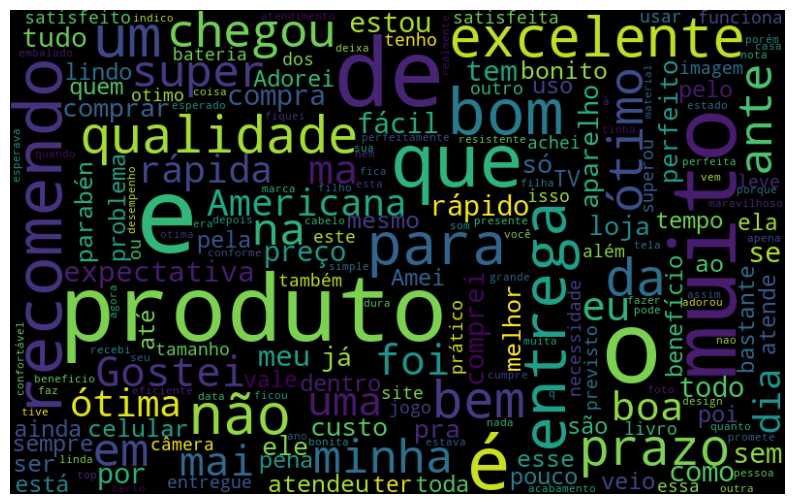

In [33]:
word_cloud_pos(avaliacoes, "review_text")

NLTK

In [40]:
import nltk as nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\vntprni\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\vntprni\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\vntprni\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\vntprni\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\vntprni\AppData\Roaming\nltk

True

In [35]:
corpus = ['muito bom este produto', 'muito ruim este produto']
frequencia = nlkt.FreqDist(corpus)
frequencia

FreqDist({'muito bom este produto': 1, 'muito ruim este produto': 1})

In [43]:
from nltk import tokenize
frase = "muito bom este produto"
token_por_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_por_espaco.tokenize(frase)
token_frase

['muito', 'bom', 'este', 'produto']

In [44]:
token_por_espaco = tokenize.WhitespaceTokenizer()

In [45]:
token_dataset = token_por_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_dataset)
frequencia

FreqDist({'e': 89308, 'o': 76053, 'de': 75791, 'a': 66640, 'que': 53574, 'não': 44253, 'do': 36776, 'muito': 36566, 'é': 36314, 'produto': 34983, ...})

In [48]:
dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()), "Frequencia": list(frequencia.values())})

In [49]:
dataframe_frequencia.head()

,Palavra,Frequencia
0,Bem,413
1,macio,216
2,e,89308
3,felpudo...recomendo.,1
4,Preço,334


In [51]:
dataframe_frequencia.nlargest(columns = "Frequencia", n = 10)

,Palavra,Frequencia
2,e,89308
20,o,76053
17,de,75791
39,a,66640
50,que,53574
33,não,44253
23,do,36776
43,muito,36566
60,é,36314
21,produto,34983


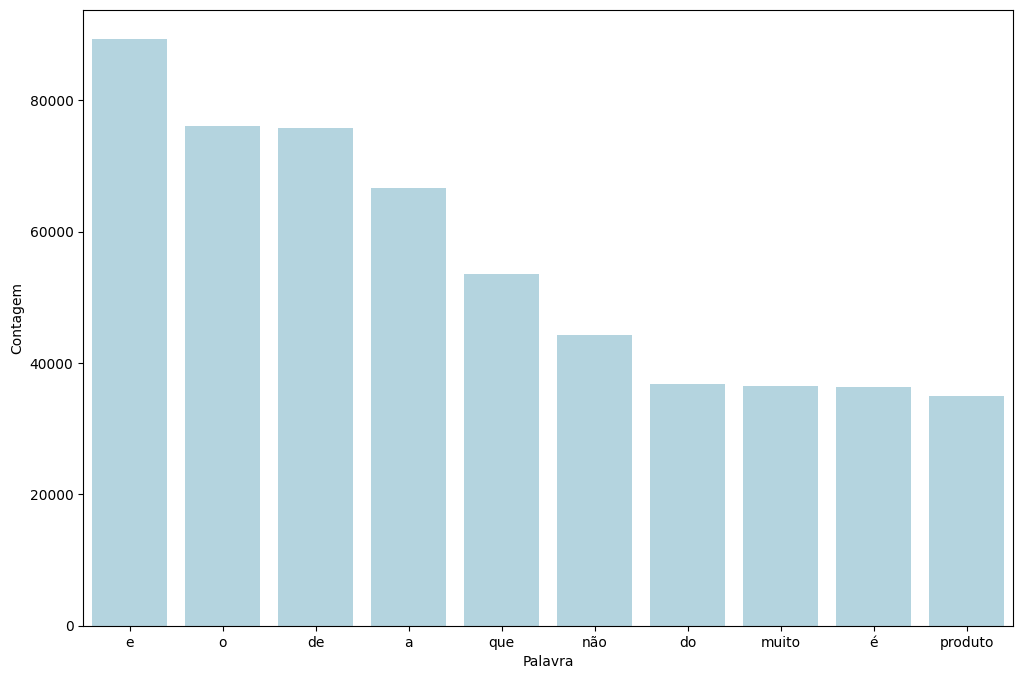

In [53]:
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.barplot(data = dataframe_frequencia.nlargest(columns= "Frequencia", n=10),
                 x= "Palavra", y= "Frequencia", color = "lightblue")
ax.set(ylabel = "Contagem")
plt.show()

In [57]:
def grafico(dados, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in dados[coluna_texto]])
    token_frase = token_por_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    dataframe_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                          "Frequencia": list(frequencia.values())})
    dataframe_frequencia.nlargest(columns = "Frequencia", n = quantidade)
    ax = sns.barplot(data = dataframe_frequencia.nlargest(columns= "Frequencia", n=quantidade),
                 x= "Palavra", y= "Frequencia", color = "lightblue")
    ax.set(ylabel = "Contagem")
    plt.show()


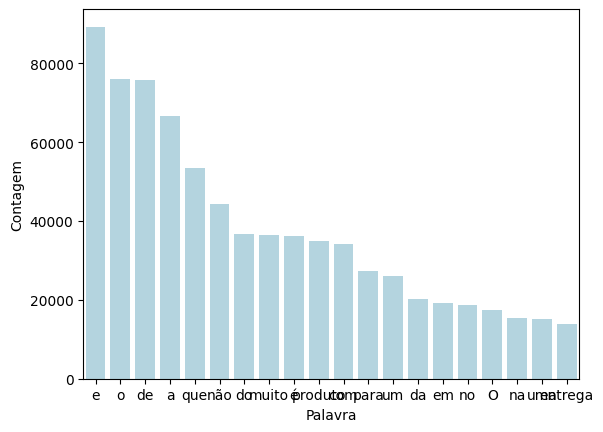

In [58]:
grafico(avaliacoes, "review_text", 20)

Remoção de stop words

In [59]:
palavras_irrelevantes = nlkt.corpus.stopwords.words("portuguese")
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [61]:
frase_peocessada = list()
for avaliacao in avaliacoes.review_text:
    nova_frase = list()
    palavras_texto = token_por_espaco.tokenize(avaliacao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_peocessada.append(' '.join(nova_frase))
avaliacoes["texto_sem_stopwords"] = frase_peocessada            

In [62]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco..."


In [63]:
treinar_modelo(avaliacoes, "texto_sem_stopwords", "polarity")

0.8873686024470102

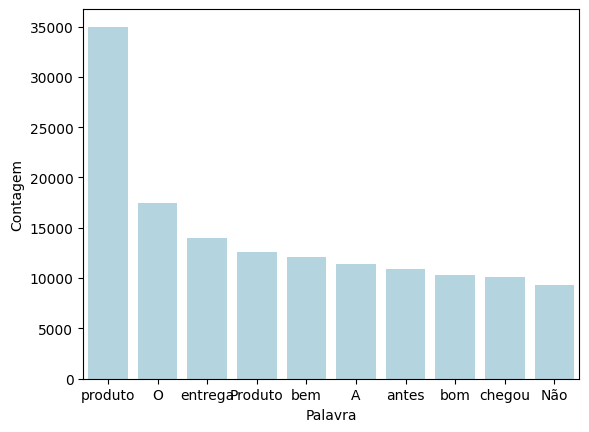

In [64]:
grafico(avaliacoes, "texto_sem_stopwords", 10)

In [65]:
from nltk import tokenize
frase = "Muito bom, este produto."
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
token_frase

['Muito', 'bom', ',', 'este', 'produto', '.']

In [66]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)
pontuacao

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [70]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_peocessada = list()
for avaliacao in avaliacoes.texto_sem_stopwords:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(avaliacao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_peocessada.append(' '.join(nova_frase))
avaliacoes["texto_sem_stopwords_e_pontuacao"] = frase_peocessada

In [71]:
avaliacoes.head()

,review_text,polarity,texto_sem_stopwords,texto_sem_stopwords_e_pontuacao
0,Bem macio e felpudo...recomendo. Preço imbatí...,1.0,Bem macio felpudo...recomendo. Preço imbatível...,Bem macio felpudo ... recomendo Preço imbatíve...
1,Produto excepcional! recomendo!!! inovador e ...,1.0,Produto excepcional! recomendo!!! inovador gos...,Produto excepcional recomendo !!! inovador gos...
2,recebi o produto antes do prazo mas veio com d...,0.0,recebi produto antes prazo veio defeito trava ...,recebi produto antes prazo veio defeito trava ...
3,Bom custo beneficio. Adequado para pessoas que...,1.0,Bom custo beneficio. Adequado pessoas fazem us...,Bom custo beneficio Adequado pessoas fazem uso...
5,"ótmo produto atendeu as expectativas, a entreg...",1.0,"ótmo produto atendeu expectativas, entrega oco...",ótmo produto atendeu expectativas entrega ocor...


In [72]:
avaliacoes.texto_sem_stopwords[5]

'ótmo produto atendeu expectativas, entrega ocorreu antes previsto. bom'

In [73]:
avaliacoes.texto_sem_stopwords_e_pontuacao[5]

'ótmo produto atendeu expectativas entrega ocorreu antes previsto bom'

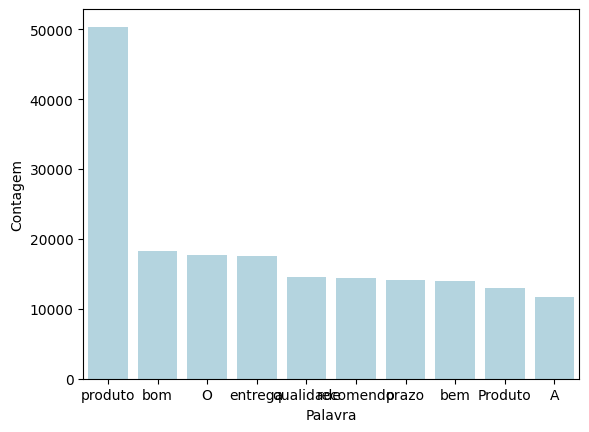

In [76]:
grafico(avaliacoes, "texto_sem_stopwords_e_pontuacao", 10)